# KNN regression

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

<Axes: xlabel='0', ylabel='1'>

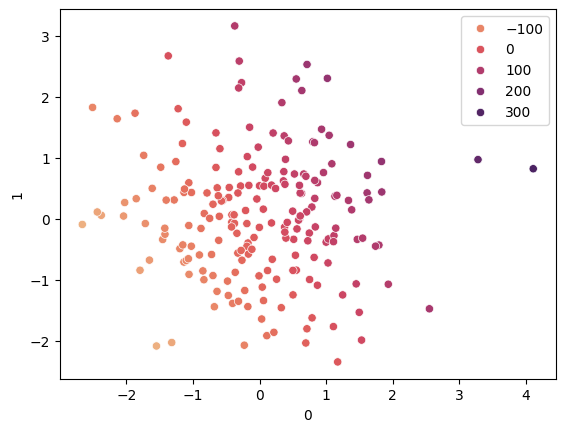

In [50]:
from sklearn.datasets import make_regression
data = make_regression(n_samples=200, n_features=2,noise=1, random_state=2)
#data = (np.array([[1,2],[4,6],[8,9],[1,4],[4,5],[6,8],[9,0],[1,0]]), np.array([1,8,6,4,2,3,0,6]))
df = pd.DataFrame(data=data[0])
df
y = data[1]
sns.scatterplot(x=0,y=1,hue=y,palette='flare', data=df)


In [51]:
from sklearn.model_selection import train_test_split
x_train,  x_test,y_train, y_test = train_test_split(np.array(df),y,test_size=0.4,random_state=2)
k = 3#Hyper Parameter



In [52]:
dis = np.array(list(map(lambda x:np.sqrt(np.sum((x-x_train)**2,axis=1)),x_test)))
dis = dis.argsort()
dis = dis[:,:k]
#dis


In [53]:
y_pred = np.array(list(map(lambda x:np.array(list(map(lambda l:y_train[l],x))).mean(),dis)))
y_pred
from sklearn.metrics import r2_score, mean_absolute_percentage_error, median_absolute_error
print("R2 Score: ",r2_score(y_pred,y_test))
print("MAPE -",100-mean_absolute_percentage_error(y_pred,y_test))

R2 Score:  0.9324768510506583
MAPE - 99.19230072232214


In [54]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
Knn = KNeighborsRegressor()
param_grid = {
    'n_neighbors': [1, 2, 3, 4],  # Test different values of k
    'weights': ['uniform', 'distance'],  # Use uniform or distance-based weighting
    'p': [1, 2]  # Distance metric: p=1 is Manhattan, p=2 is Euclidean
}
OptKnn = GridSearchCV(Knn,param_grid=param_grid,cv=5,scoring='r2',n_jobs=-1)
OptKnn.fit(x_train,y_train)
y_pred2 = OptKnn.best_estimator_.predict(x_test.reshape(-1,2))
print("Best params: ",OptKnn.best_params_)
print("R2 Score: ",OptKnn.best_score_)
print("MAPE -",100-mean_absolute_percentage_error(y_pred2,y_test))

Best params:  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
R2 Score:  0.9302866221477067
MAPE - 99.78277697739364


<Axes: >

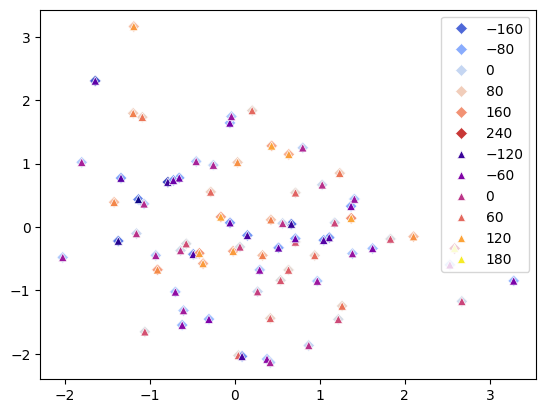

In [55]:
x_test = x_test.reshape(2,-1)
sns.scatterplot(x=x_test[0],y=x_test[1],hue=y_test,palette='coolwarm', marker='D')
sns.scatterplot(x=x_test[0],y=x_test[1],hue=y_pred,palette='plasma', marker='^')